In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading time analysis

In [5]:
voos = []

voos.append(pd.read_csv('./Raw/voo-01.csv'))
voos.append(pd.read_csv('./Raw/voo-02.csv'))
voos.append(pd.read_csv('./Raw/voo-03.csv'))
voos.append(pd.read_csv('./Raw/voo-04.csv'))
voos.append(pd.read_csv('./Raw/voo-05.csv'))
voos.append(pd.read_csv('./Raw/voo-06.csv'))
voos.append(pd.read_csv('./Raw/voo-07.csv'))
voos.append(pd.read_csv('./Raw/voo-08.csv'))
voos.append(pd.read_csv('./Raw/voo-09.csv'))
voos.append(pd.read_csv('./Raw/voo-10.csv'))
voos.append(pd.read_csv('./Raw/voo-11.csv'))

In [6]:
def time_analysis(df):
    df['time_diff'] = df['Time'].diff()

    number_of_readings = len(df['time_diff'])
    total_time = df["Time"].iloc[-1] - df["Time"].iloc[0]
    max_diff = df['time_diff'].max()
    min_diff = df['time_diff'].min()
    mean_diff = df['time_diff'].mean()

    print("General Statistics")
    print(f"Max: {max_diff} ms")
    print(f"Min: {min_diff} ms")
    print(f"Amplitude: {(max_diff - min_diff):.2f} ms")
    print(f"Mean: {(mean_diff):.2f} ms")
    print(f"Total time: {(total_time/1000):.2f} s")
    print(f"Average readings per second: {(number_of_readings / total_time*1000):.2f}")

    # Histogram of time between each reading
    plt.plot(df['time_diff'])
    plt.title('Time between readings')
    plt.xlabel('Reading number')
    plt.ylabel('Time difference (ms)')
    plt.show()

-=-=- Voo 1 -=-=-
General Statistics
Max: 82.0 ms
Min: 34.0 ms
Amplitude: 48.00 ms
Mean: 39.15 ms
Total time: 143.89 s
Average readings per second: 25.55


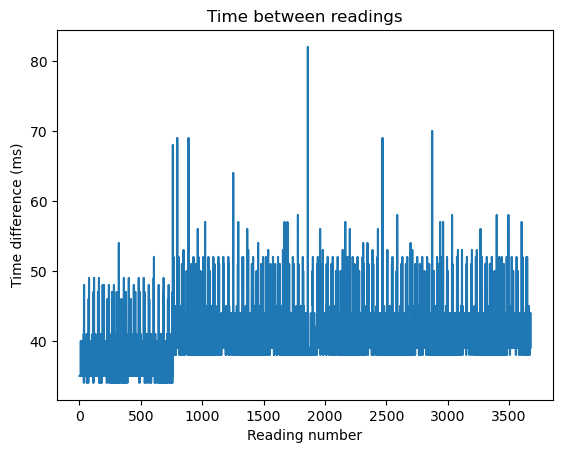


-=-=- Voo 2 -=-=-
General Statistics
Max: 1035.0 ms
Min: 34.0 ms
Amplitude: 1001.00 ms
Mean: 39.05 ms
Total time: 91.10 s
Average readings per second: 25.62


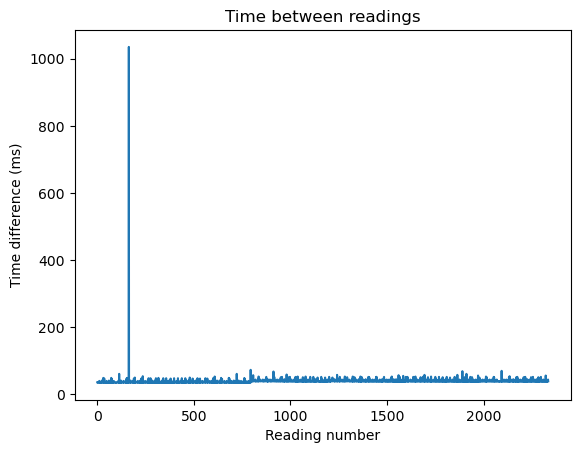


-=-=- Voo 3 -=-=-
General Statistics
Max: 95.0 ms
Min: 34.0 ms
Amplitude: 61.00 ms
Mean: 38.32 ms
Total time: 73.04 s
Average readings per second: 26.11


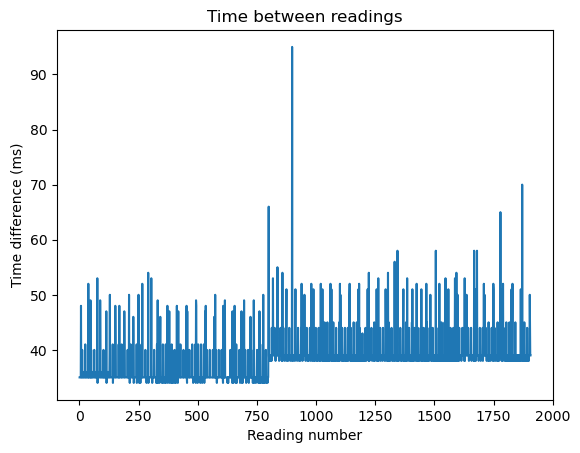


-=-=- Voo 4 -=-=-
General Statistics
Max: 69.0 ms
Min: 34.0 ms
Amplitude: 35.00 ms
Mean: 37.29 ms
Total time: 48.11 s
Average readings per second: 26.83


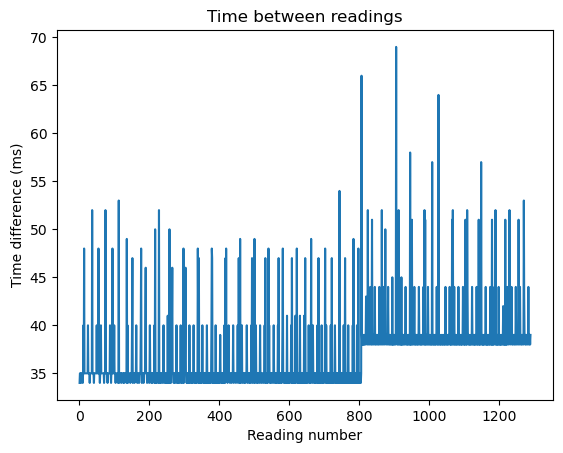


-=-=- Voo 5 -=-=-
General Statistics
Max: 54.0 ms
Min: 34.0 ms
Amplitude: 20.00 ms
Mean: 35.73 ms
Total time: 3.50 s
Average readings per second: 28.27


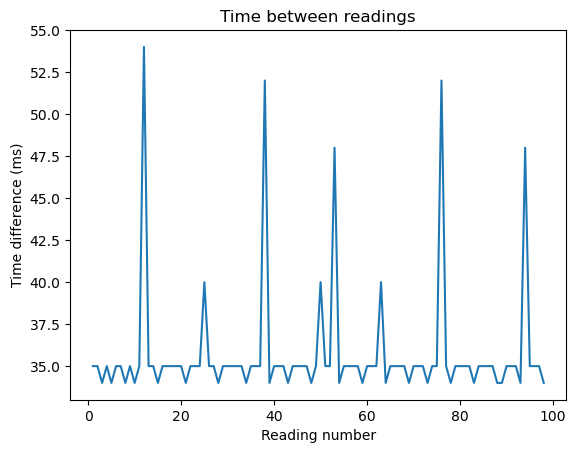


-=-=- Voo 6 -=-=-
General Statistics
Max: 49.0 ms
Min: 34.0 ms
Amplitude: 15.00 ms
Mean: 35.86 ms
Total time: 13.77 s
Average readings per second: 27.96


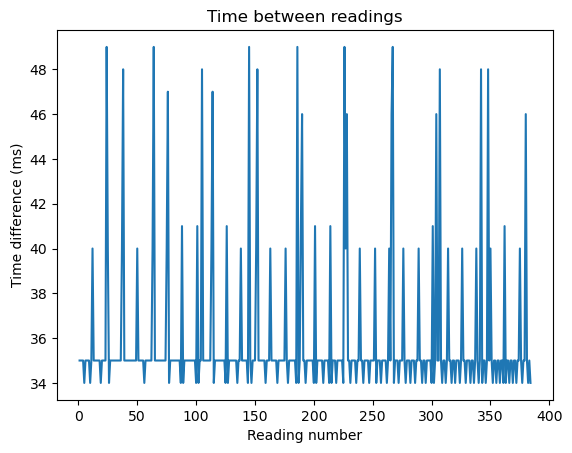


-=-=- Voo 7 -=-=-
General Statistics
Max: 83.0 ms
Min: 34.0 ms
Amplitude: 49.00 ms
Mean: 37.77 ms
Total time: 52.69 s
Average readings per second: 26.49


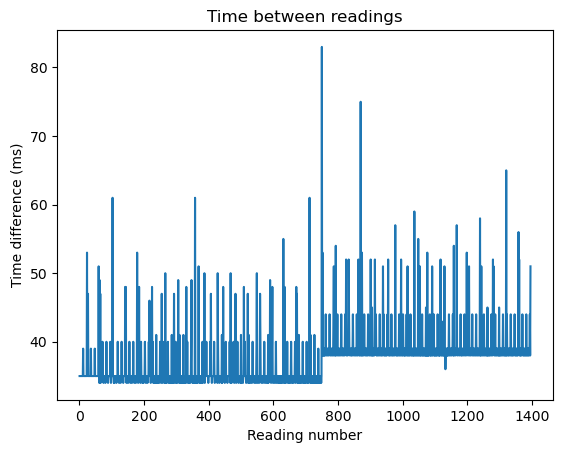


-=-=- Voo 8 -=-=-
General Statistics
Max: 65.0 ms
Min: 2.0 ms
Amplitude: 63.00 ms
Mean: 2.91 ms
Total time: 19.26 s
Average readings per second: 343.94


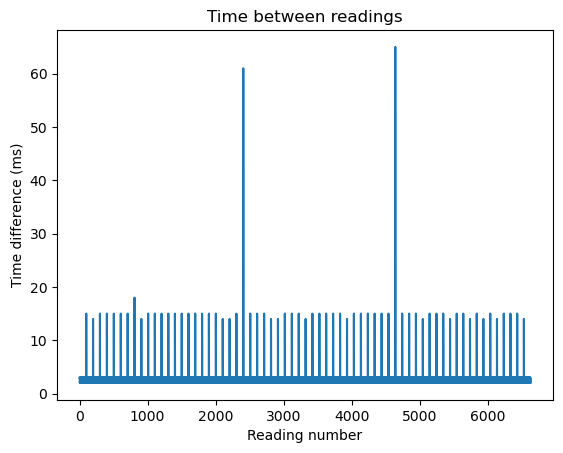


-=-=- Voo 9 -=-=-
General Statistics
Max: 46.0 ms
Min: 2.0 ms
Amplitude: 44.00 ms
Mean: 3.30 ms
Total time: 1.58 s
Average readings per second: 303.80


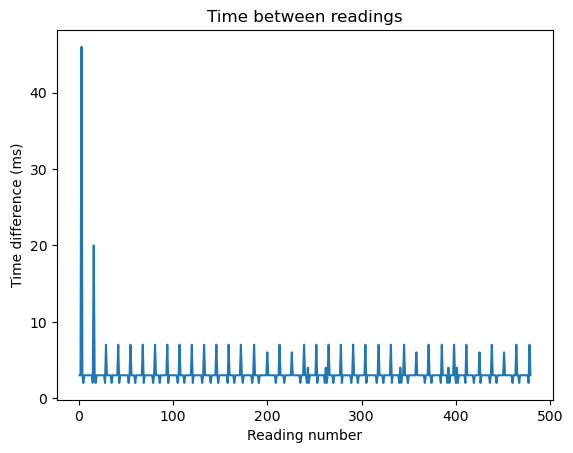


-=-=- Voo 10 -=-=-
General Statistics
Max: 468.0 ms
Min: 12.0 ms
Amplitude: 456.00 ms
Mean: 13.44 ms
Total time: 72.02 s
Average readings per second: 74.41


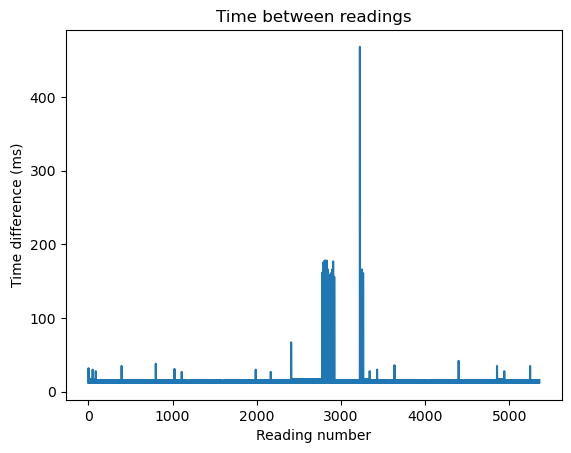


-=-=- Voo 11 -=-=-
General Statistics
Max: 57.0 ms
Min: 11.0 ms
Amplitude: 46.00 ms
Mean: 12.15 ms
Total time: 75.19 s
Average readings per second: 82.34


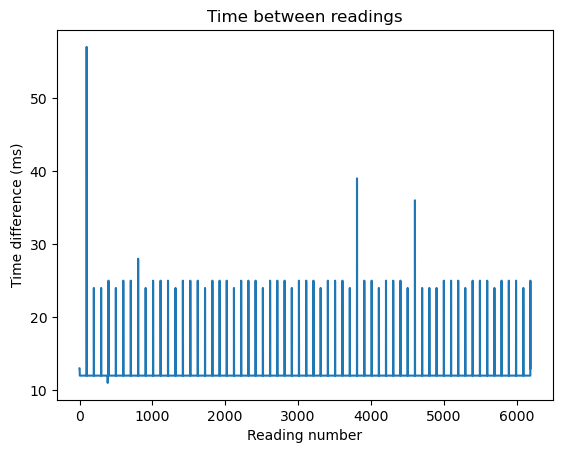

In [7]:
for i, voo in enumerate(voos):
    print(f"-=-=- Voo {i+1} -=-=-")
    time_analysis(voo)
    print()

# Data Processing

In [8]:
def relative_time(df):
    first_time = df["Time"].iloc[0]
    df["Time"] = df["Time"] - first_time

In [9]:
def sensor_calibration(df, ref):
    relative_time(df)

    # Using voo01 as reference
    # Until 37s the aero is still
    ref_AcelX_mean = (ref['Acel. X'].iloc[0:370]).mean()
    ref_AcelY_mean = (ref['Acel. Y'].iloc[0:370]).mean()
    ref_AcelZ_mean = (ref['Acel. Z'].iloc[0:370]).mean()

    df['Acel. X'] = df['Acel. X'] - ref_AcelX_mean
    df['Acel. Y'] = df['Acel. Y'] - ref_AcelY_mean
    df['Acel. Z'] = (df['Acel. Z'] - ref_AcelZ_mean) + 9.807

    ref_RotX_mean = (ref['Rot. X'].iloc[0:370]).mean()
    ref_RotY_mean = (ref['Rot. Y'].iloc[0:370]).mean()
    ref_RotZ_mean = (ref['Rot. Z'].iloc[0:370]).mean()

    df['Rot. X'] = df['Rot. X'] - ref_RotX_mean
    df['Rot. Y'] = df['Rot. Y'] - ref_RotY_mean
    df['Rot. Z'] = df['Rot. Z'] - ref_RotZ_mean

In [10]:
for i, voo in enumerate(voos):
    if i != 0:
        sensor_calibration(voo, voos[0])

# The reference must be the last one
sensor_calibration(voos[0], voos[0])

# Sensor plotting

In [22]:
def plot_sensors(df):
    plt.figure(figsize=(7, 4))
    plt.plot(df['Time'] / 1000, df['Acel. X'], label='Acel. X')
    plt.plot(df['Time'] / 1000, df['Acel. Y'], label='Acel. Y')
    plt.plot(df['Time'] / 1000, df['Acel. Z'], label='Acel. Z')
    plt.title('Acceleration')  
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(7, 4))
    plt.plot(df['Time'] / 1000, df['Rot. X'], label='Rot. X')
    plt.plot(df['Time'] / 1000, df['Rot. Y'], label='Rot. Y')
    plt.plot(df['Time'] / 1000, df['Rot. Z'], label='Rot. Z')
    plt.title('Rotation')
    plt.xlabel('Time (s)')
    plt.ylabel('Rotation (rad/s)')
    plt.legend()
    plt.show()


-=-=- Voo 1 -=-=-


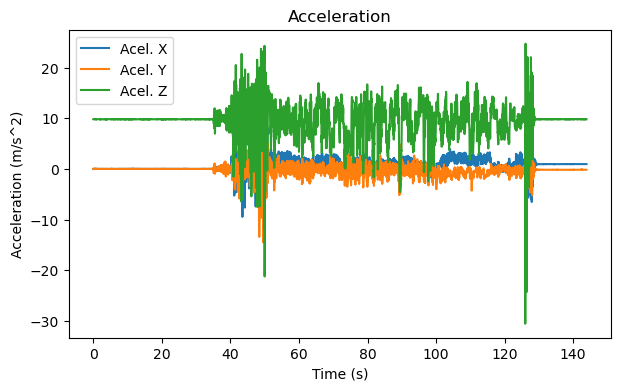

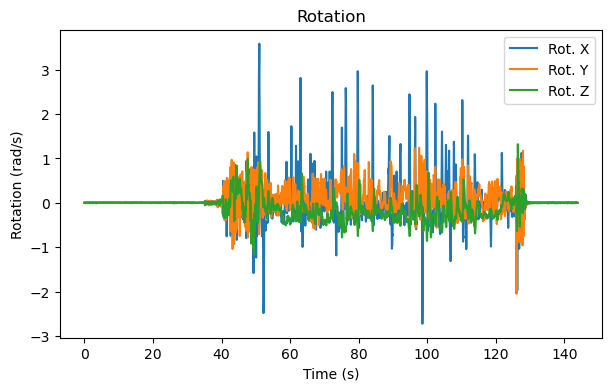


-=-=- Voo 2 -=-=-


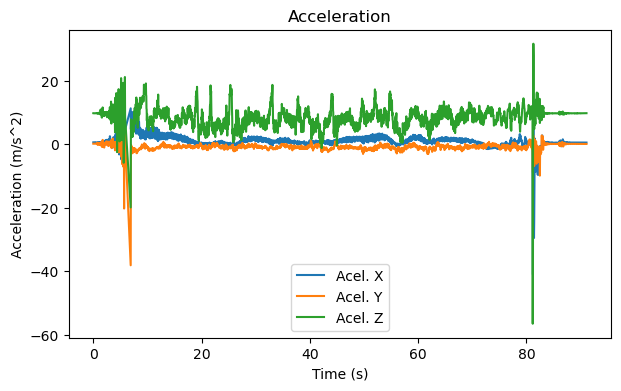

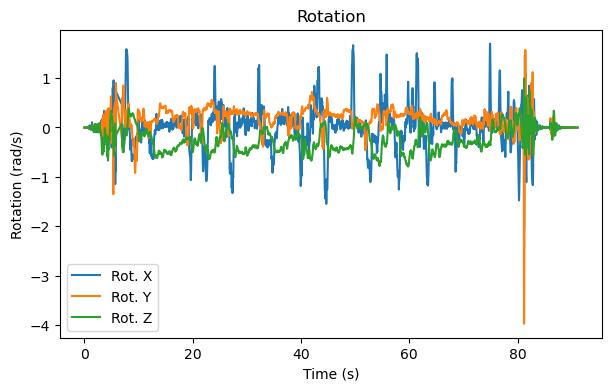


-=-=- Voo 3 -=-=-


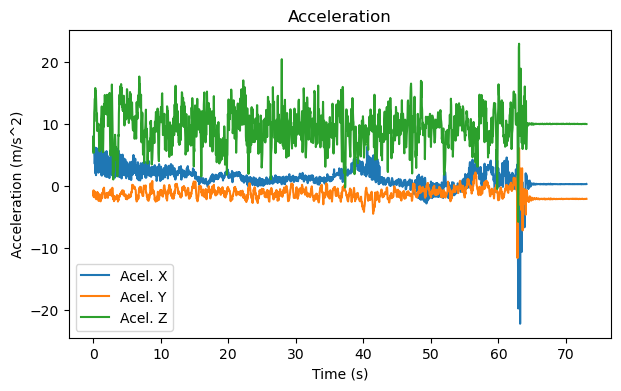

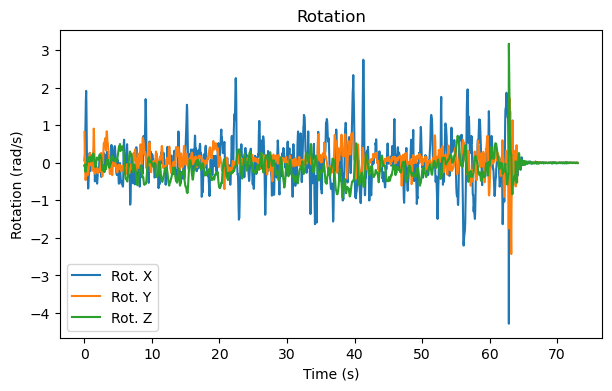


-=-=- Voo 4 -=-=-


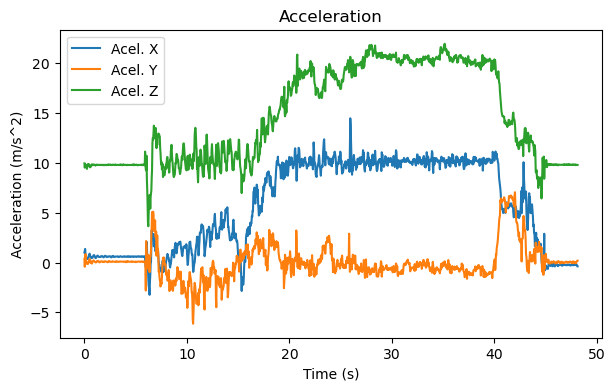

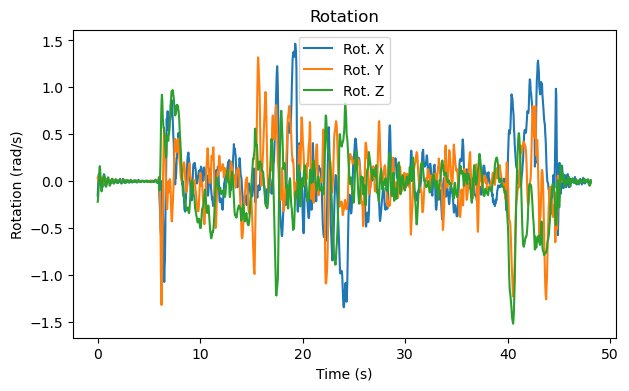


-=-=- Voo 5 -=-=-


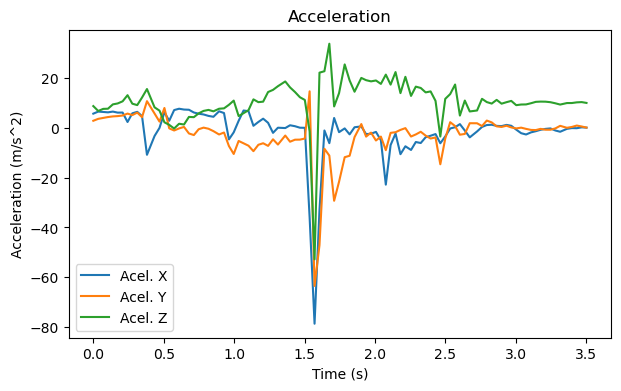

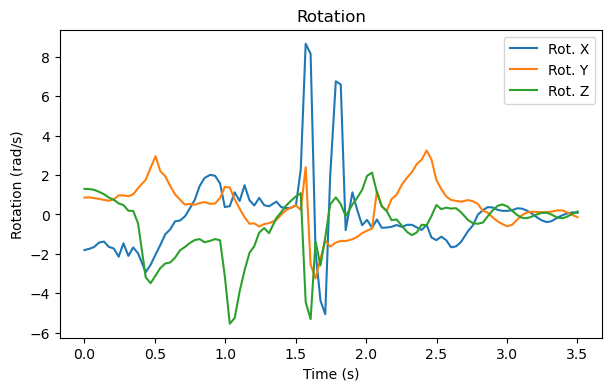


-=-=- Voo 6 -=-=-


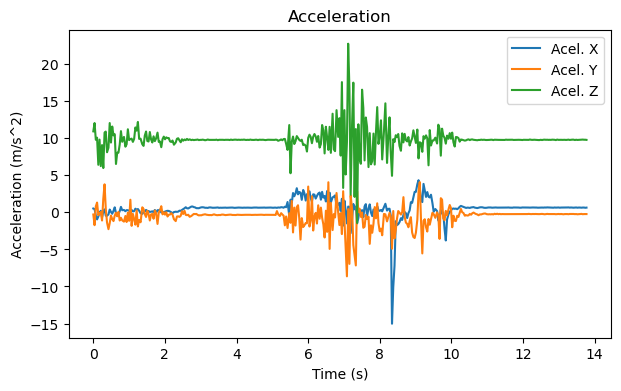

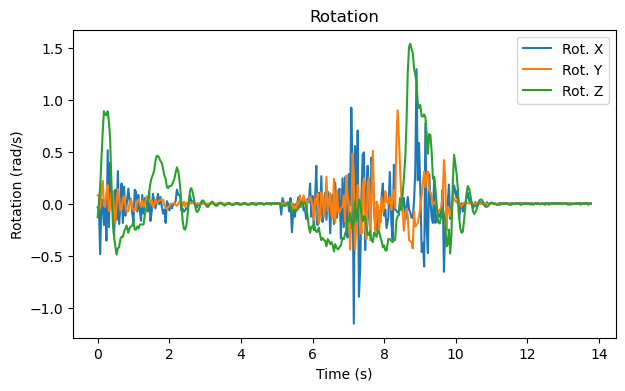


-=-=- Voo 7 -=-=-


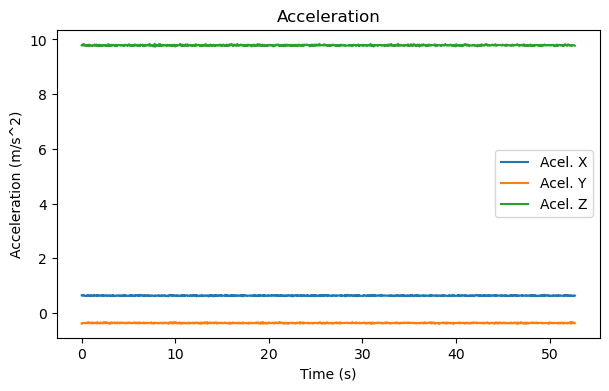

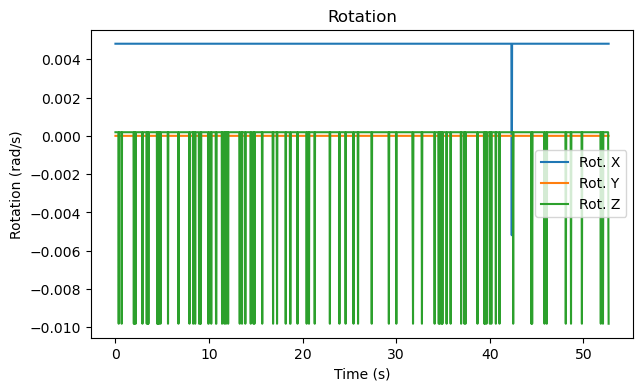


-=-=- Voo 8 -=-=-


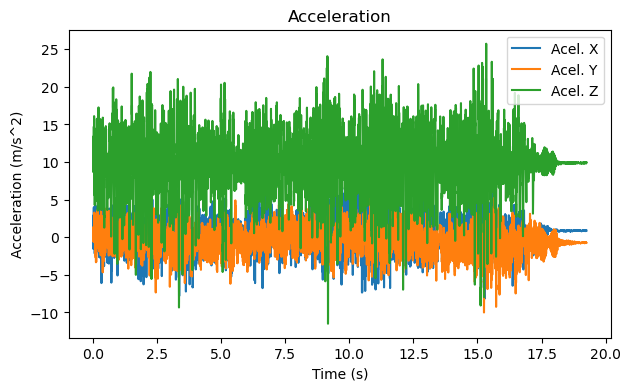

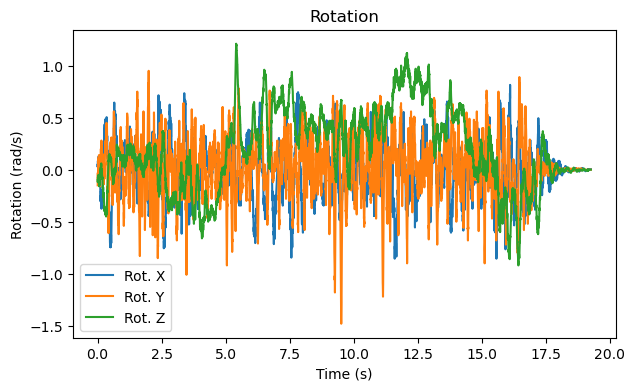


-=-=- Voo 9 -=-=-


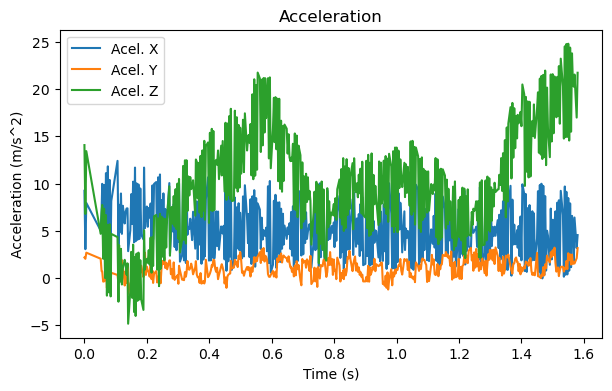

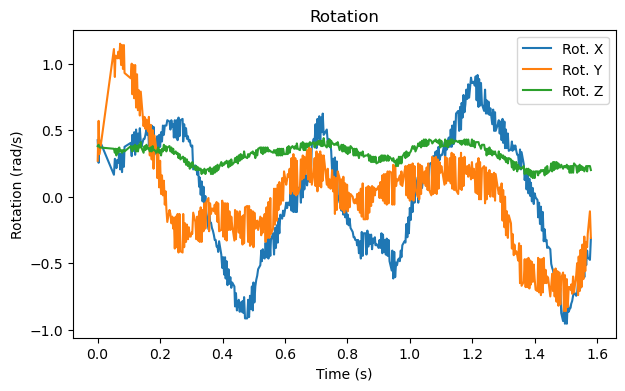


-=-=- Voo 10 -=-=-


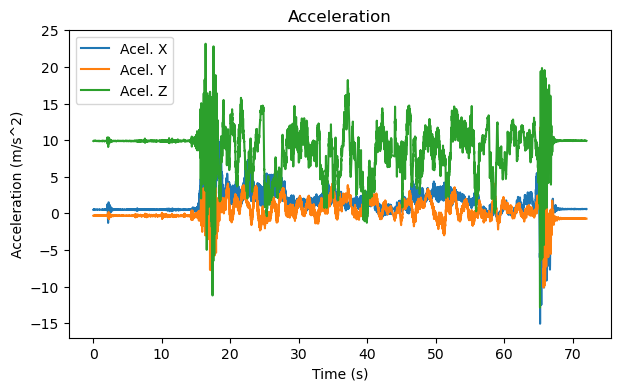

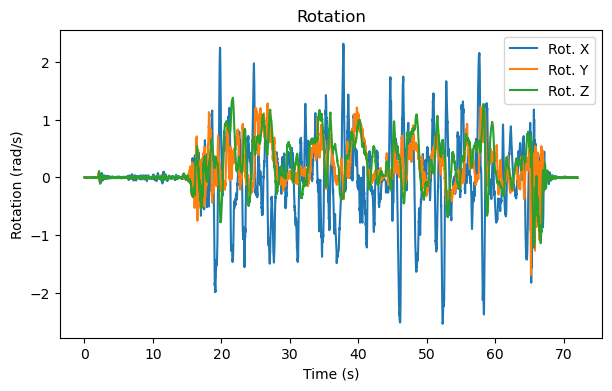


-=-=- Voo 11 -=-=-


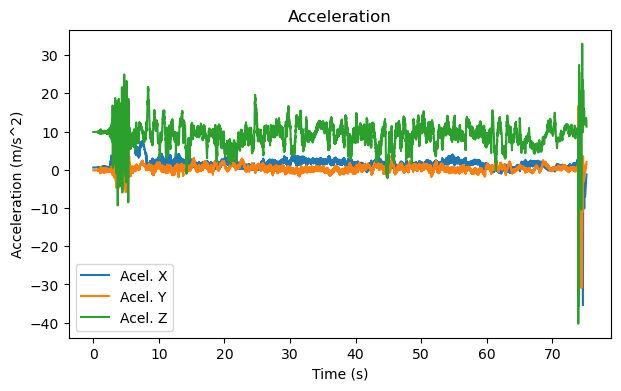

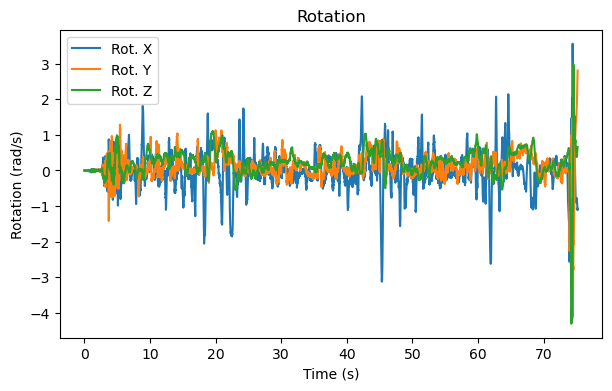

In [23]:
for i, voo in enumerate(voos):
    print(f"-=-=- Voo {i+1} -=-=-")
    plot_sensors(voo)
    print()

**Rotations reference:**
- Axis X: Roll
- Axis Y: Pitch
- Axis Z: Yaw

# Export data

In [24]:
for i, voo in enumerate(voos):
    voo.to_csv(f'Processed/voo-0{i+1}-processed.csv', index=False)